## Section 0: Introducing the Libraries
**Tensorflow** is a deep learning library for developing neural networks. Its primary functionality is autodifferentiation and backpropagation gradient descent. 
Similar libraries include: PyTorch, Theano, Caffe, etc

Another Machine Learning (not Deep Learning) library is scikit-learn

**Numpy** is a data science library that allows many tensor (multi-dimensional arrays) operations

**MatplotLib** is a plotting library

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Reading in Data
For the sake of convenience, we use a built-in dataset of tf.keras. You can of course load in any data (in the format of numpy or python list or tensors and it will work the same way)

In [3]:
train_data, test_data = tf.keras.datasets.cifar10.load_data()
label_names = dict(zip(range(10),['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']))
print(label_names)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [4]:
print(train_data[0].shape)
print(train_data[1].shape)
print(test_data[0].shape)
print(test_data[1].shape)

train_img,train_label = train_data
test_img, test_label = test_data
train_img = train_img.astype('float32')/255.0
test_img = test_img.astype('float32')/255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


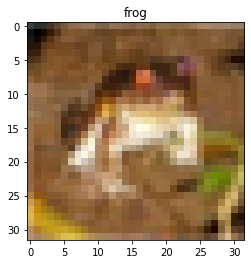

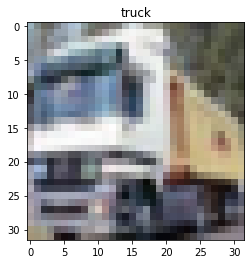

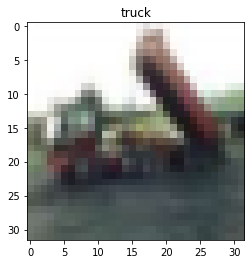

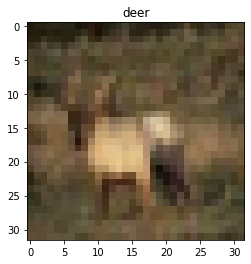

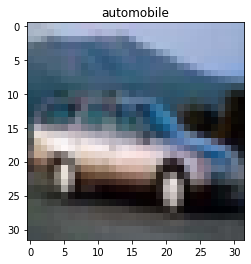

In [5]:
for i in range(5):
    plt.figure()
    plt.title(label_names[train_label[i].item()])
    plt.imshow(train_img[i])

## Section 2: Building the Model
We will build a densely connected MLP (Multilayer Perceptron) model. We will use the Sequential API to stack layers together to form our model (there're more APIs for different ways of building models)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512,activation='relu', input_shape=(None,3072)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,656,842
Trainable params: 1,656,842
Non-trainable params: 0
_________________________________________________________________


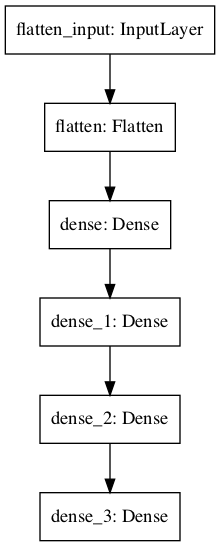

In [7]:
model.summary()
tf.keras.utils.plot_model(model)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

## Section 3: Training Model
Here we use model.fit to train the model. It performs stochastic gradient descent (as specified in the optimizer).

In [9]:
history = model.fit(train_img,train_label,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 3s 9ms/step - loss: 2.0783 - sparse_categorical_accuracy: 0.2455 - val_loss: 1.8377 - val_sparse_categorical_accuracy: 0.3477
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 1.7414 - sparse_categorical_accuracy: 0.3762 - val_loss: 1.6884 - val_sparse_categorical_accuracy: 0.4011
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6421 - sparse_categorical_accuracy: 0.4123 - val_loss: 1.6177 - val_sparse_categorical_accuracy: 0.4281
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5721 - sparse_categorical_accuracy: 0.4382 - val_loss: 1.6101 - val_sparse_categorical_accuracy: 0.4260
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 1.5210 - sparse_categorical_accuracy: 0.4601 - val_loss: 1.5739 - val_sparse_categorical_accuracy: 0.4385
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 1.5031 - sparse_categori

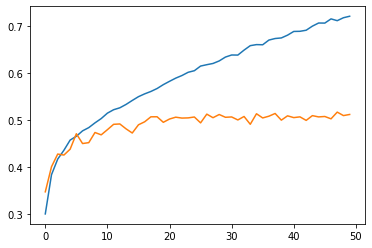

In [15]:
accs = history.history['sparse_categorical_accuracy']
val_accs = history.history['val_sparse_categorical_accuracy']
plt.figure()
plt.plot(range(len(accs)),accs)
plt.plot(range(len(val_accs)),val_accs)

## Section 4: Evaluation
Now we have a trained model which we can evaluate!

In [16]:
loss, acc = model.evaluate(test_img, test_label)
print(loss, acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.6926 - sparse_categorical_accuracy: 0.5142
1.6925642490386963 0.51419997215271


In [17]:
pred = model.predict(test_img)
pred.shape

(10000, 10)

In [18]:
pred = np.argmax(pred,axis=-1)

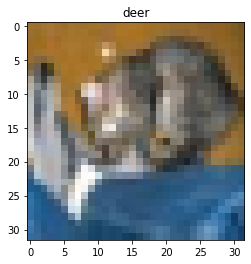

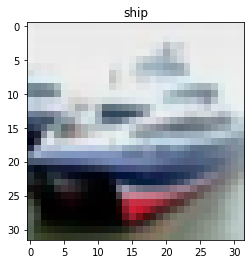

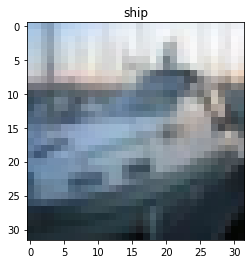

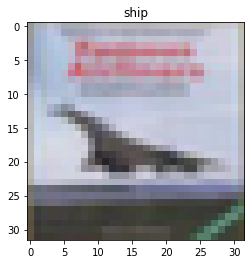

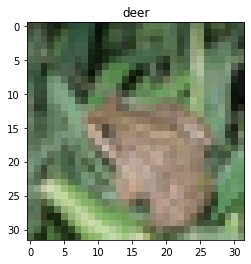

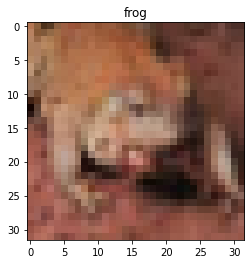

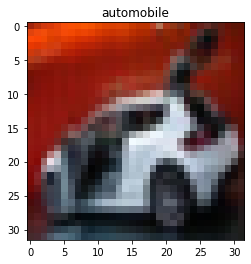

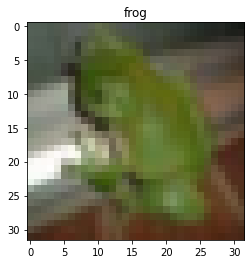

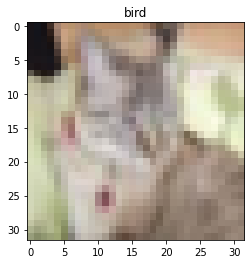

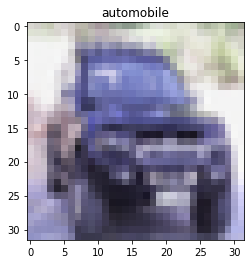

In [19]:
for i in range(10):
    plt.figure()
    plt.title(label_names[pred[i]])
    plt.imshow(test_img[i])